## At the end of this notebook you can find the different F1 Scores for different combinations of initial h_o and finals h_f heights. 

(Full documented "paz" module can be found in this same repository.)

In [2]:
import paz
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from matplotlib.font_manager import FontProperties
from tqdm.notebook import tqdm

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')

In [5]:
df = paz.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = paz.clean_dataframe(df)

In [10]:
his = np.arange(0.1,9.,0.1)
hfs = np.arange(1.,21.,0.1)
percentiles = np.linspace(0.90,0.99,10)
results=[[],[],[],[],[],[],[],[],[],[]]

In [11]:
i = 0 
for p in tqdm(percentiles):
    matrix = np.zeros([111,211])
    print(matrix.max())
    for hi in tqdm(his):
        for hf in hfs:

            if hi<hf:
                array = paz.getF1score(df,hi,hf,p)
                results[i].append(array)
    i = i+1
          
    

  0%|          | 0/10 [00:00<?, ?it/s]

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

0.0


  0%|          | 0/89 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [38]:
y=np.array([np.array(element) for element in results[9]]) #aqui tendras que añadir un "for element in results[0]" (para el primer percentile)
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.1        8.2        4.52988    7.56070975 0.3963964 ]


In [40]:
p1,r1,p,r,truth,label1 = paz.getPrecisionRecall(df,0.1,8.2,0.99)
print(p,r)


For the avg_dphi h001 - h082 :
Optimal threshold: = 7.56
F1score: 0.396

0.32673267326732675 0.5038167938931297


/Users/codefrom0/Documents/final_thesis/do_functions.py:379: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)


### 95% percentile for True precipitation


In [43]:
his = np.arange(0.1,11.,0.1)
hfs = np.arange(1.,21.,0.1)
matrix = np.zeros([111,211])
results=[]
print(matrix.max())
for hi in tqdm(his):
    for hf in hfs:
        
        i = int(10.*hi)
        j = int(10.*hf)
        
        if hi<hf:
            array = paz.getF1score(df,hi,hf,0.95)
            matrix[i][j] = array[4]
            results.append(array)

            

0.0


  0%|          | 0/109 [00:00<?, ?it/s]

/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)
/Users/codefrom0/Documents/final_thesis/do_functions.py:333: RuntimeWarning: invalid value encountered in true_divide
  f1_scores 

In [46]:
y=np.array([np.array(element) for element in results])
f1scores = y[:,4]
x = np.argmax(f1scores)
print(y[x])

[0.6        9.3        1.776      3.8216935  0.53410248]


In [48]:
matrix[6,93]

0.5341024770953513

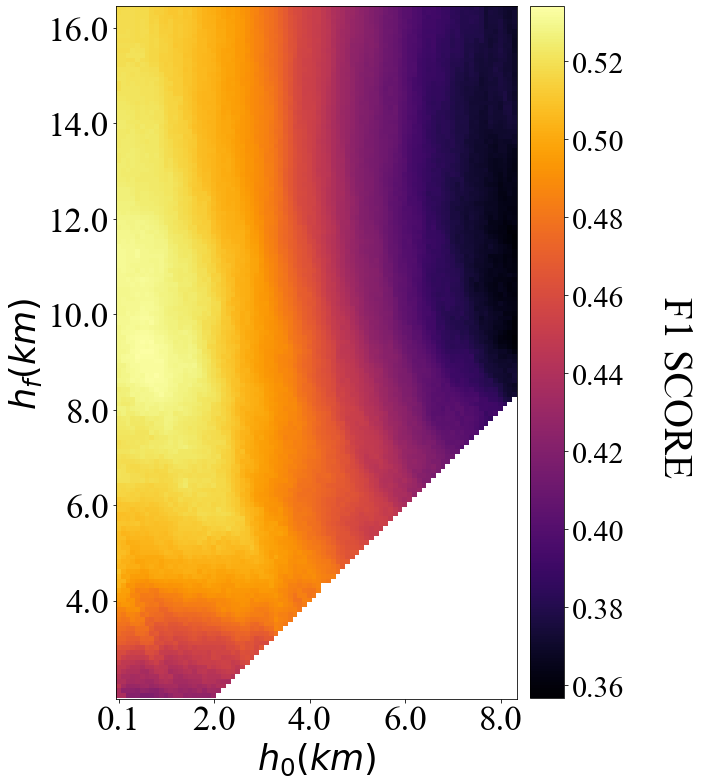

In [57]:
matrix = np.ma.masked_equal(matrix,0)
matrix[44,:] = (matrix[43,:]+matrix[45,:])/2.0

plt.figure(figsize=(17,11), tight_layout=True)

plt.subplot(121)
plt.imshow(matrix[1:85,21:166].T,cmap='inferno')

plt.gca().invert_yaxis()


plt.xticks(ticks=[0,20,40,
                  60,80], 
           labels=['0.1','2.0','4.0',
                   '6.0','8.0'],
           fontproperties=font, 
           fontsize=35)
plt.yticks(ticks=[20,
                  40,60,80,
                  100,120,140], 
           labels=['4.0','6.0',
                   '8.0','10.0','12.0',
                   '14.0','16.0'],
           fontproperties=font, 
           fontsize=35)
       

plt.xlabel(r'$h_0 (km)$', 
           fontproperties=font,
           fontsize=35)
plt.ylabel(r'$h_f (km)$',
           fontproperties=font,
           fontsize=35)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(30)
        

cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=40,labelpad=70, y=0.45)

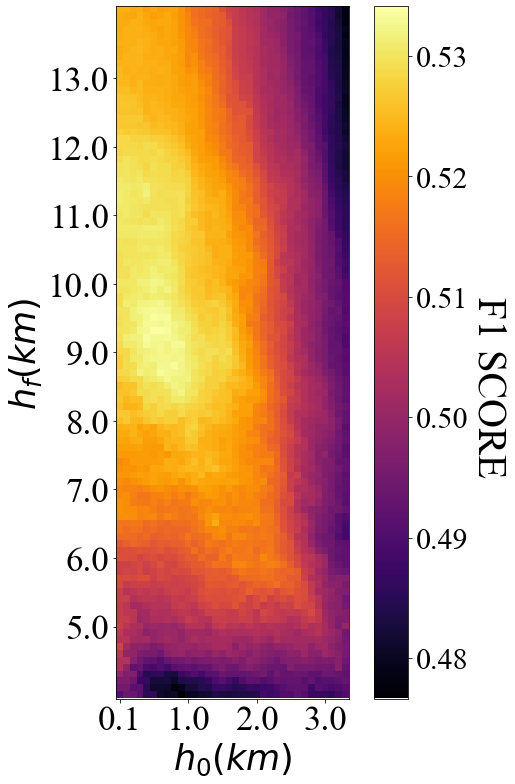

In [58]:
matrix = np.ma.masked_equal(matrix,0)
matrix[44,:] = (matrix[43,:]+matrix[45,:])/2.0
plt.figure(figsize=(14,11), tight_layout=True)
plt.imshow(matrix[1:35,40:141].T,cmap='inferno')

plt.gca().invert_yaxis()

plt.xticks(ticks=[0,10,20,30], 
           labels=['0.1','1.0','2.0','3.0'],
           fontproperties=font, 
           fontsize=35)
plt.yticks(ticks=[10,20,30,40,
                  50,60,70,80,90], 
           labels=['5.0','6.0','7.0','8.0',
                   '9.0','10.0','11.0','12.0','13.0'],
           fontproperties=font, 
           fontsize=35)
       
plt.xlabel(r'$h_0 (km)$', 
           fontproperties=font,
           fontsize=35)
plt.ylabel(r'$h_f (km)$',
           fontproperties=font,
           fontsize=35)

cb = plt.colorbar(pad=0.025)
for t in cb.ax.get_yticklabels():
     t.set_font(font)
     t.set_fontsize(30)
        
cb.set_label('F1 SCORE',
               rotation=270,
               fontproperties=font,
               fontsize=40,labelpad=40, y=0.45)